In [97]:
# 필요한 모듈 import

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [98]:
# 데이터 파일 업로드

train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
sub = pd.read_csv('./sample_submission.csv')

In [99]:
# 평가식 정의
def NMAE(true, pred):
    mae = np.mean(np.abs(true-pred))
    score = mae / np.mean(np.abs(true))
    return score

In [100]:
# EDA 및 데이터 전처리

In [101]:
train.head()

,id,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st Flr SF,Bsmt Qual,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt,target
0,1,10,2392,Ex,3,968,Ex,2392,2392,Ex,2,2003,2003,2003,386250
1,2,7,1352,Gd,2,466,Gd,1352,1352,Ex,2,2006,2007,2006,194000
2,3,5,900,TA,1,288,TA,864,900,TA,1,1967,1967,1967,123000
3,4,5,1174,TA,2,576,Gd,680,680,TA,1,1900,2006,2000,135000
4,5,7,1958,Gd,3,936,Gd,1026,1026,Gd,2,2005,2005,2005,250000


In [102]:
test.head()

,id,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st Flr SF,Bsmt Qual,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt
0,1,9,1800,Gd,2,702,Ex,1800,1800,Ex,2,2007,2007,2007
1,2,6,1082,TA,1,240,TA,1082,1082,TA,1,1948,1950,1948
2,3,6,1573,Gd,2,440,Gd,756,769,Gd,2,2000,2000,2000
3,4,6,2443,Gd,3,744,Gd,1158,1158,Gd,2,2004,2004,2004
4,5,5,1040,TA,2,686,TA,1040,1040,TA,1,1968,1968,1991


In [103]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1350 entries, 0 to 1349
Data columns (total 15 columns):
id                1350 non-null int64
Overall Qual      1350 non-null int64
Gr Liv Area       1350 non-null int64
Exter Qual        1350 non-null object
Garage Cars       1350 non-null int64
Garage Area       1350 non-null int64
Kitchen Qual      1350 non-null object
Total Bsmt SF     1350 non-null int64
1st Flr SF        1350 non-null int64
Bsmt Qual         1350 non-null object
Full Bath         1350 non-null int64
Year Built        1350 non-null int64
Year Remod/Add    1350 non-null int64
Garage Yr Blt     1350 non-null int64
target            1350 non-null int64
dtypes: int64(12), object(3)
memory usage: 158.3+ KB


In [104]:
test.info() # train, test 모두 결측치 없음, train과 test 비율 1:1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1350 entries, 0 to 1349
Data columns (total 14 columns):
id                1350 non-null int64
Overall Qual      1350 non-null int64
Gr Liv Area       1350 non-null int64
Exter Qual        1350 non-null object
Garage Cars       1350 non-null int64
Garage Area       1350 non-null int64
Kitchen Qual      1350 non-null object
Total Bsmt SF     1350 non-null int64
1st Flr SF        1350 non-null int64
Bsmt Qual         1350 non-null object
Full Bath         1350 non-null int64
Year Built        1350 non-null int64
Year Remod/Add    1350 non-null int64
Garage Yr Blt     1350 non-null int64
dtypes: int64(11), object(3)
memory usage: 147.8+ KB


In [105]:
# 품질 부분 encoding
# 나머지 scaling 후 회귀분석

In [106]:
# encoding을 위해 품질 부분 고유값 확인

print(train['Exter Qual'].unique(),train['Kitchen Qual'].unique(),train['Bsmt Qual'].unique())
print(test['Exter Qual'].unique(),test['Kitchen Qual'].unique(),test['Bsmt Qual'].unique())
# train과 test의 kichen qual 부분 고유값이 다름 -> label encoding, 나머지는 one hot encoding

['Ex' 'Gd' 'TA' 'Fa'] ['Ex' 'Gd' 'TA' 'Fa'] ['Ex' 'TA' 'Gd' 'Fa' 'Po']
['Gd' 'TA' 'Ex' 'Fa'] ['Ex' 'TA' 'Gd' 'Fa' 'Po'] ['Ex' 'TA' 'Gd' 'Fa' 'Po']


In [107]:
# label encoding (for문 이용)

train_kichen = []
test_kichen = []

# train data
for i in range(len(train)):
    if train['Kitchen Qual'][i]=='Ex':
        train_kichen.append(0)
    elif train['Kitchen Qual'][i]=='Gd':
        train_kichen.append(1)
    elif train['Kitchen Qual'][i]=='TA':
        train_kichen.append(2)
    elif train['Kitchen Qual'][i]=='Fa':
        train_kichen.append(3)
    else:
        train_kichen.append(4)

# test data
for i in range(len(train)):
    if test['Kitchen Qual'][i]=='Ex':
        test_kichen.append(0)
    elif test['Kitchen Qual'][i]=='Gd':
        test_kichen.append(1)
    elif test['Kitchen Qual'][i]=='TA':
        test_kichen.append(2)
    elif test['Kitchen Qual'][i]=='Fa':
        test_kichen.append(3)
    else:
        test_kichen.append(4)
        
train['Kitchen Qual'] = train_kichen
test['Kitchen Qual'] = test_kichen

In [108]:
# One Hot encoding

train = pd.get_dummies(train, drop_first=True)
test = pd.get_dummies(test, drop_first=True)

In [109]:
# 특성 선택

In [110]:
# 특성간 상관관계 확인

corr = train.iloc[:,1:13].corr()
corr

,Overall Qual,Gr Liv Area,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st Flr SF,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt,target
Overall Qual,1.000000,0.588243,0.571066,0.517218,-0.679331,0.509058,0.476398,0.554248,0.582875,0.579142,0.553927,0.810607
Gr Liv Area,0.588243,1.000000,0.516287,0.480863,-0.420098,0.419220,0.522535,0.612423,0.232281,0.315723,0.261861,0.742061
Garage Cars,0.571066,0.516287,1.000000,0.840054,-0.456323,0.466017,0.445017,0.513078,0.505803,0.433307,0.562320,0.634497
Garage Area,0.517218,0.480863,0.840054,1.000000,-0.433334,0.499634,0.485843,0.418852,0.445816,0.364369,0.536310,0.617151
Kitchen Qual,-0.679331,-0.420098,-0.456323,-0.433334,1.000000,-0.408315,-0.374477,-0.423282,-0.506322,-0.616938,-0.512632,-0.660750
Total Bsmt SF,0.509058,0.419220,0.466017,0.499634,-0.408315,1.000000,0.868811,0.367648,0.403767,0.265506,0.347908,0.664047
1st Flr SF,0.476398,0.522535,0.445017,0.485843,-0.374477,0.868811,1.000000,0.370299,0.290443,0.236692,0.259898,0.646843
Full Bath,0.554248,0.612423,0.513078,0.418852,-0.423282,0.367648,0.370299,1.000000,0.508745,0.472537,0.498692,0.554453
Year Built,0.582875,0.232281,0.505803,0.445816,-0.506322,0.403767,0.290443,0.508745,1.000000,0.616008,0.815615,0.546037
Year Remod/Add,0.579142,0.315723,0.433307,0.364369,-0.616938,0.265506,0.236692,0.472537,0.616008,1.000000,0.644251,0.529477


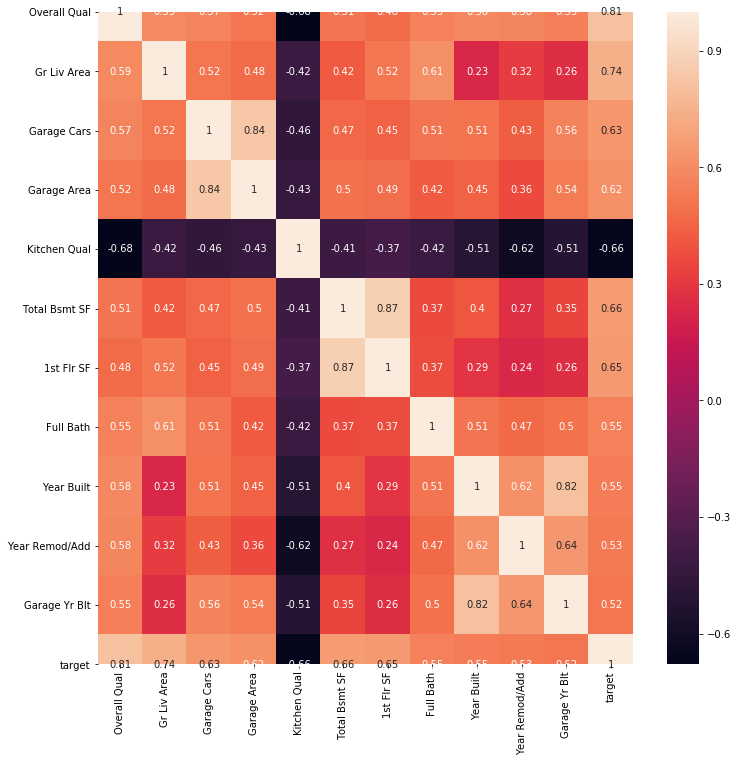

In [111]:
plt.figure(figsize=(12,12))
sns.heatmap(corr, annot=True);

# Kitchen Qual은 삭제하는것도 괜찮을듯

In [112]:
# X, y 정의
X = train.drop(['id', 'target'],axis=1)
y = train.target
X_t = test.drop(['id'], axis=1)

In [113]:
# scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_t_scaled = scaler.transform(X_t)

In [114]:
# 학습, 검증 데이터 분리

X_train, X_val, y_train, y_val = train_test_split(X_scaled,y,test_size=0.3,random_state=42)

In [115]:
# 특성 중요도 비교를 위한 RF모델 생성

from sklearn.ensemble import RandomForestRegressor

# max_depth = 11ver.
rf = RandomForestRegressor(n_estimators=1000, criterion='absolute_error', max_depth = 11, max_features = 'log2',
                               min_samples_split = 9, min_samples_leaf = 1, min_impurity_decrease = 0.8)
rf.fit(X_train, y_train)
y_val_pred = rf.predict(X_val)
y_train_pred = rf.predict(X_train)
print(NMAE(y_val, y_val_pred))
print(NMAE(y_train, y_train_pred))

0.09361322203524189
0.06694444309668107


In [116]:
# RF 특성 중요도 시각화
features = ['Overall Qual', 'Gr Liv Area', 'Garage Cars', 'Garage Area',
       'Kitchen Qual', 'Total Bsmt SF', '1st Flr SF', 'Full Bath',
       'Year Built', 'Year Remod/Add', 'Garage Yr Blt',
       'Exter Qual_Fa', 'Exter Qual_Gd', 'Exter Qual_TA',
       'Bsmt Qual_Fa', 'Bsmt Qual_Gd', 'Bsmt Qual_Po',
       'Bsmt Qual_TA']

f_imp = pd.Series(rf.feature_importances_, index=features).sort_values(ascending=False)
f_imp

Overall Qual      0.174302
Gr Liv Area       0.156489
Year Built        0.090570
Garage Area       0.084274
1st Flr SF        0.083831
Total Bsmt SF     0.076598
Exter Qual_TA     0.057776
Full Bath         0.052801
Garage Cars       0.049232
Kitchen Qual      0.048576
Garage Yr Blt     0.044608
Year Remod/Add    0.035719
Exter Qual_Gd     0.019441
Bsmt Qual_Gd      0.012167
Bsmt Qual_TA      0.010192
Bsmt Qual_Fa      0.002386
Exter Qual_Fa     0.001038
Bsmt Qual_Po      0.000000
dtype: float64

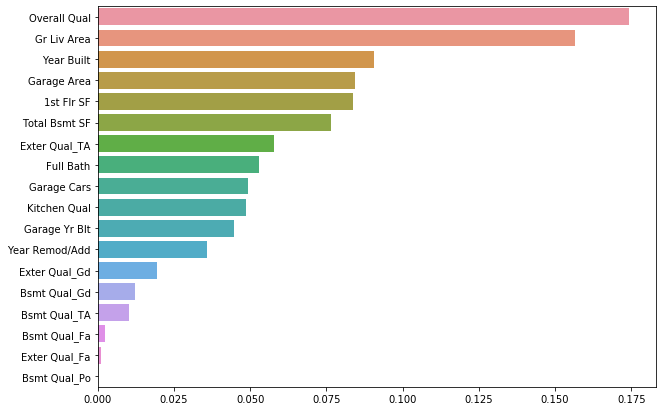

In [117]:
plt.figure(figsize=(10,7))
sns.barplot(x=f_imp.values, y=f_imp.index);

In [118]:
# 특성 중요도 비교를 위한 RF모델 생성

from sklearn.ensemble import RandomForestRegressor

# max_depth = 11ver.
rf = RandomForestRegressor(n_estimators=100, criterion='absolute_error', max_depth = 11, max_features = 'log2',
                               min_samples_split = 9, min_samples_leaf = 1, min_impurity_decrease = 0.8)
rf.fit(X_train, y_train)
y_val_pred = rf.predict(X_val)
y_train_pred = rf.predict(X_train)
print(NMAE(y_val, y_val_pred))
print(NMAE(y_train, y_train_pred))

0.09353755769051644
0.06813014669301573


In [119]:
# Sequential Feature Selection

from sklearn.feature_selection import SequentialFeatureSelector

scores = []

for n_feature in range(1,18):
    sfs = SequentialFeatureSelector(rf, n_features_to_select = n_feature, n_jobs=-1)
    sfs.fit(X_train, y_train)
    f_mask = sfs.support_
    print('# of f_mask:',np.count_nonzero(f_mask))
    print('f_mask:',f_mask)
    rf.fit(X_train[:,f_mask],y_train)
    scores.append(rf.score(X_train[:,f_mask],y_train)) # 결정계수 반환

# of f_mask: 1
f_mask: [ True False False False False False False False False False False False
 False False False False False False]
# of f_mask: 2
f_mask: [ True  True False False False False False False False False False False
 False False False False False False]
# of f_mask: 3
f_mask: [ True  True False False False  True False False False False False False
 False False False False False False]
# of f_mask: 4
f_mask: [ True  True False False False  True False False  True False False False
 False False False False False False]
# of f_mask: 5
f_mask: [ True  True False False False  True False False  True False False False
 False False False  True False False]
# of f_mask: 6
f_mask: [ True  True False False False  True False False  True False False False
 False False False  True  True False]
# of f_mask: 7
f_mask: [ True  True  True False False  True  True False  True  True False False
 False False False False False False]
# of f_mask: 8
f_mask: [ True  True  True False  True  True Fa

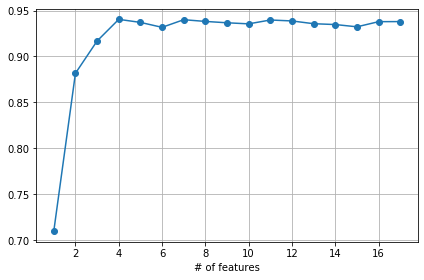

In [120]:
# SFS 결과 시각화 -> feature 수 8개 or 16개
plt.plot(range(1,18), scores, marker='o')
plt.xlabel('# of features')
plt.grid()
plt.tight_layout();

In [121]:
f_mask_8 = [ True,  True, False, False, False,  True,  True, False,  True,  True, False, False,
 False, False, False,  True,  True, False]
f_mask_16 = [True,  True,  True,  True,  True,  True,  True, False,  True,  True,  True,  True,
  True, False,  True,  True,  True, True]

In [122]:
# 결정 계수 최대 특성 수 확인
np.argmax(scores, axis=-1) #-> 16개일때 최대

3

In [123]:
# 사용 특성 수 8개 ver.

In [124]:
# X, y 재정의 및 전처리
X_train_all = X[X.columns[f_mask_8]]
y = train.target
X_test = X_t[X_t.columns[f_mask_8]]

In [125]:
# scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_train_all)
X_t_scaled = scaler.transform(X_test)

In [126]:
# 학습, 검증 데이터 분리

X_train, X_val, y_train, y_val = train_test_split(X_scaled,y,test_size=0.3,random_state=42)

In [127]:
from sklearn.ensemble import RandomForestRegressor

rf2 = RandomForestRegressor(n_estimators=1000, criterion='absolute_error', max_depth = 11, max_features = 'log2',
                               min_samples_split = 9, min_samples_leaf = 1, min_impurity_decrease = 0.8)
rf2.fit(X_train, y_train)
y_val_pred = rf2.predict(X_val)
y_train_pred = rf2.predict(X_train)
print(NMAE(y_val, y_val_pred))
print(NMAE(y_train, y_train_pred))

0.09641506641199074
0.06700673864589292


In [128]:
# 사용 특성 수 16개 ver. -> 선택

In [129]:
# X, y 재정의 및 전처리
X_train_all = X[X.columns[f_mask_16]]
y = train.target
X_test = X_t[X_t.columns[f_mask_16]]

In [130]:
# scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_train_all)
X_t_scaled = scaler.transform(X_test)

In [131]:
# 학습, 검증 데이터 분리

X_train, X_val, y_train, y_val = train_test_split(X_scaled,y,test_size=0.3,random_state=42)

In [132]:
from sklearn.ensemble import RandomForestRegressor

rf3 = RandomForestRegressor(n_estimators=1000, criterion='absolute_error', max_depth = 11, max_features = 'log2',
                               min_samples_split = 9, min_samples_leaf = 1, min_impurity_decrease = 0.8)
rf3.fit(X_train, y_train)
y_val_pred = rf3.predict(X_val)
y_train_pred = rf3.predict(X_train)
print(NMAE(y_val, y_val_pred))
print(NMAE(y_train, y_train_pred))

0.0934236761531688
0.06587164197418856


In [133]:
# 제출 파일 생성
y_pred = rf3.predict(X_t_scaled)
sub['target'] = y_pred
sub.to_csv('./sample_submission5.csv', index=False) # 제출 점수: NMAE 0.1022341763

In [134]:
# 전체 데이터 훈련 ver.
from sklearn.ensemble import RandomForestRegressor

rf4 = RandomForestRegressor(n_estimators=1000, criterion='absolute_error', max_depth = 11, max_features = 'log2',
                               min_samples_split = 9, min_samples_leaf = 1, min_impurity_decrease = 0.8)
rf4.fit(X_scaled, y)

RandomForestRegressor(criterion='absolute_error', max_depth=11,
                      max_features='log2', min_impurity_decrease=0.8,
                      min_samples_split=9, n_estimators=1000)

In [135]:
# 제출 파일 생성
y_pred = rf4.predict(X_t_scaled)
sub['target'] = y_pred
sub.to_csv('./sample_submission6.csv', index=False) # 제출 점수: NMAE 0.1006955197